# HW3 

import some packages

In [15]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz 
import sklearn

# Seed the generatpr to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

load and clean dataset

In [16]:
# load dataset
df=pd.read_csv("D:\\Intro to Business Analytics\\Homework 3\\breast-cancer-wisconsin.data.csv") 
df.head(5)

# Clean data set by retrieving all rows with complete values
df=df[df['Bare Nuclei'] != "?"]
# Describle all the variables on the new dataset
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


set x and y variables

In [17]:
X = df.iloc[:, 1:10]
y = df.iloc[:, 10:]

In [18]:
# Exploring Target Variable-Class
unique, counts = np.unique(y, return_counts=True)
print("The frequency of instances per class is: " , dict(zip(unique, counts)))
# we can notice that this dataset is balanced

The frequency of instances per class is:  {2: 444, 4: 239}


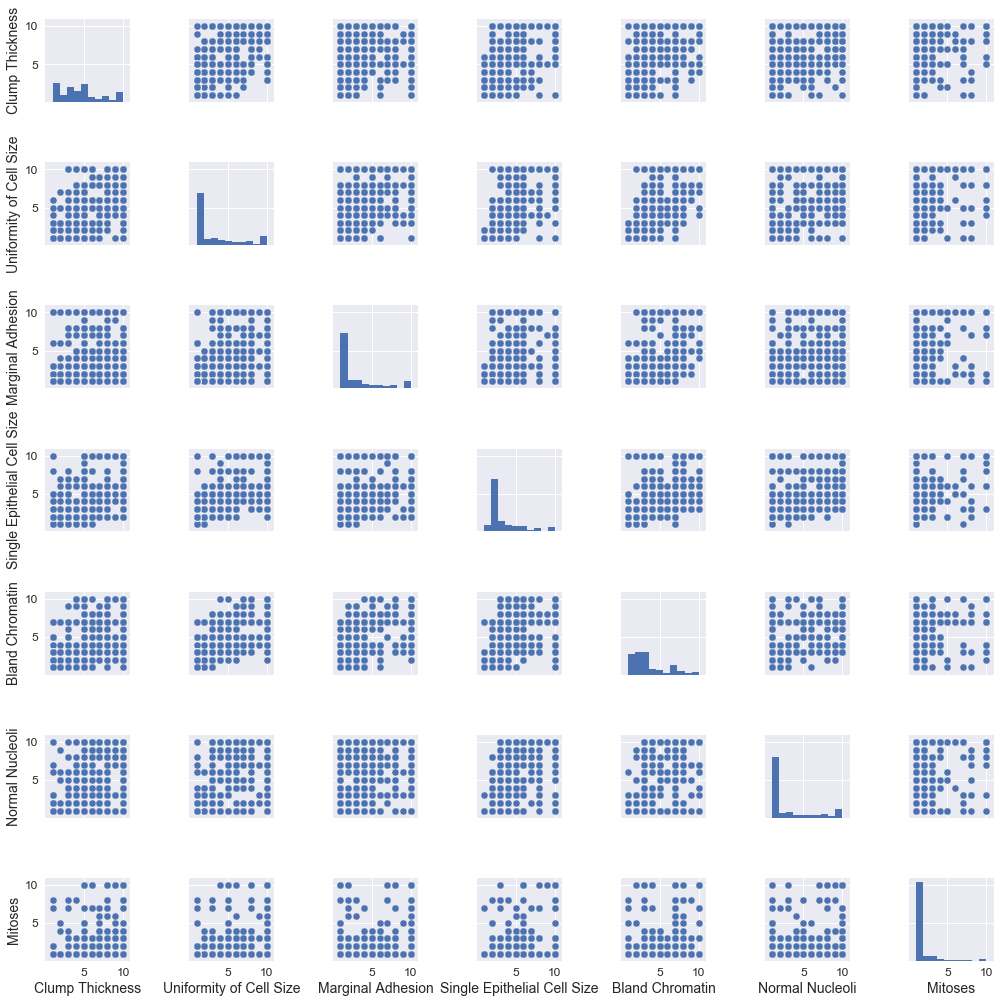

In [19]:
import seaborn as sns

cols = ['Clump Thickness', 'Uniformity of Cell Size', 'Marginal Adhesion','Single Epithelial Cell Size','Bland Chromatin','Normal Nucleoli','Mitoses']

sns.pairplot(df[cols], size=2)
plt.tight_layout()
plt.show()

split dataset

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

# Decision Tree

1.Build decision tree

In [21]:
from sklearn import tree
DTgini = tree.DecisionTreeClassifier(max_depth=6, random_state=42)
DTgini = DTgini.fit(X_train, y_train)

2.produce decision tree graph

In [22]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [23]:
import graphviz 

export_graphviz(
        DTgini,
        out_file=image_path("DT_gini.dot"),
        feature_names=list(X),
        class_names='24',
        rounded=True,
        filled=True
    )

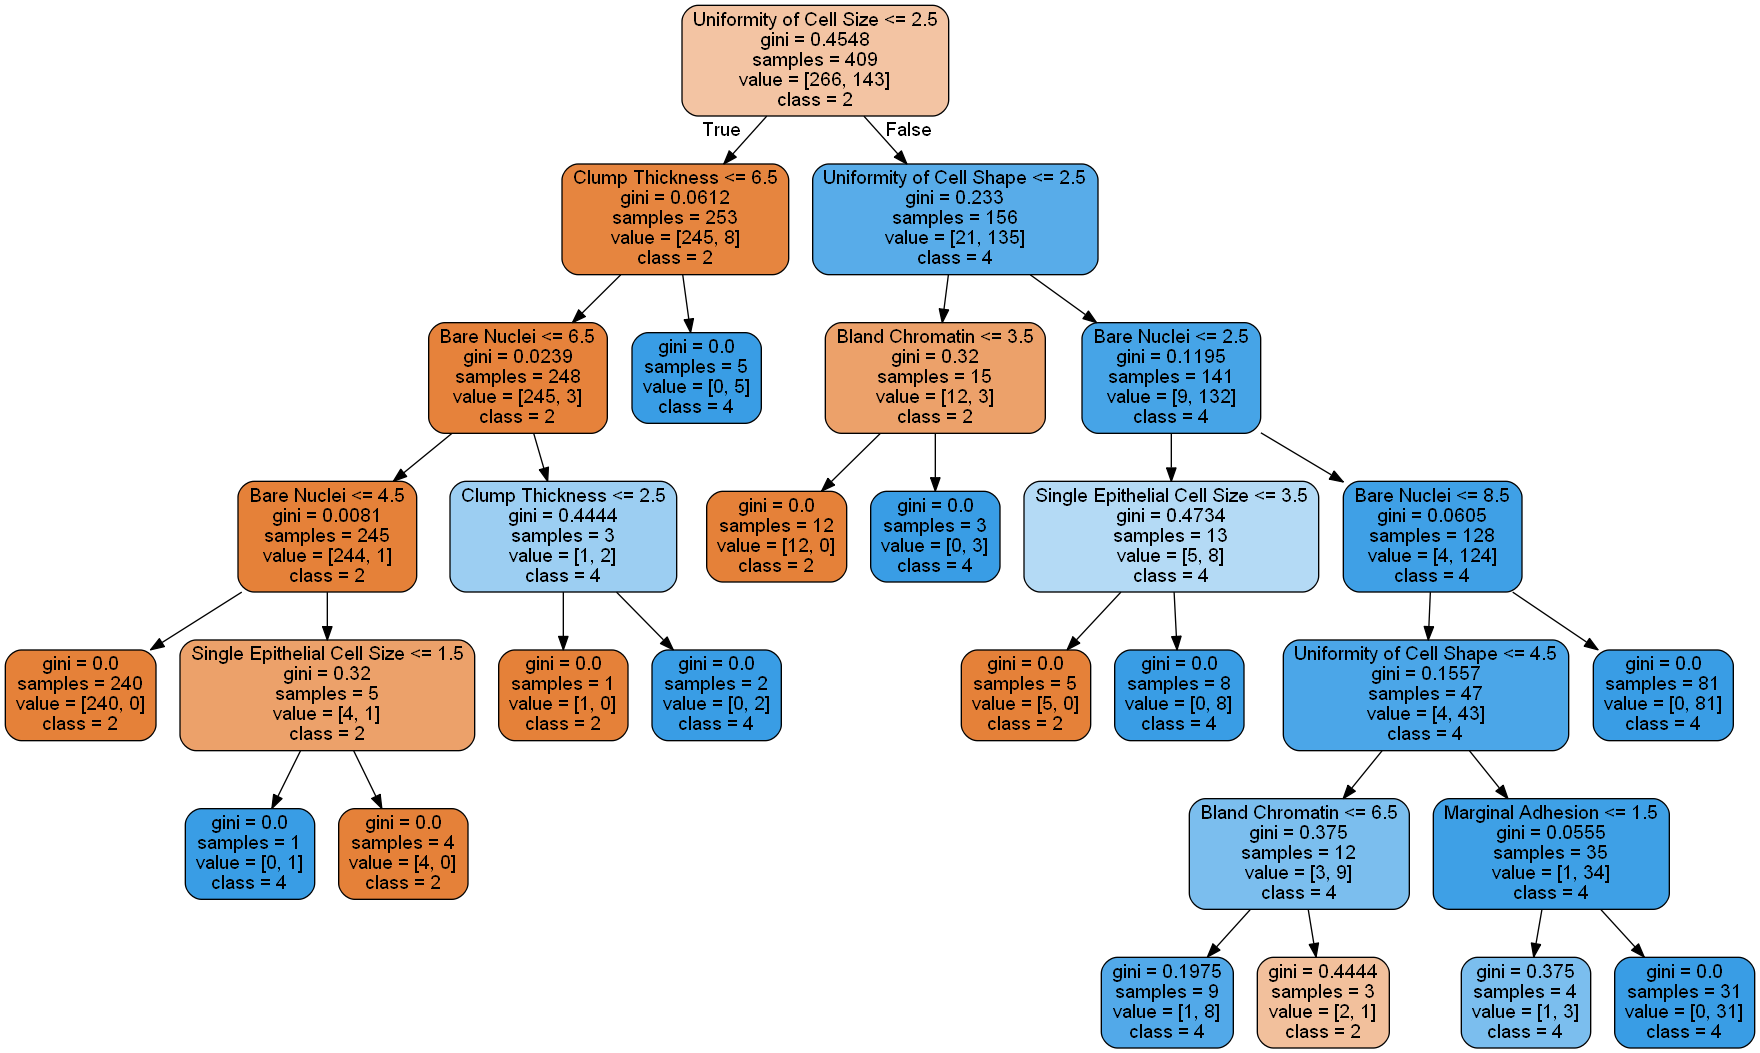

In [24]:
#dot -Tpng DT_gini.dot -o DT_gini.png
path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "DT_gini.png")
Image(path_png)

3.produce confusion matrix

Confusion matrix, without normalization
[[166  12]
 [  4  92]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.04  0.96]]


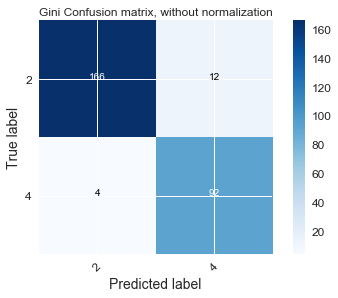

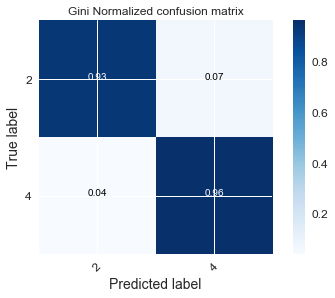

In [25]:
import itertools

y_pred_gini = DTgini.predict(X_test)

from sklearn.metrics import confusion_matrix

# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #interpolation='nearest' simply display the image without try to interpolate betwen pixels if the display resolution is not the same as the image resolution
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
DT_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(DT_matrix, classes=list(np.unique(y)),
                      title='Gini Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(DT_matrix, classes=list(np.unique(y)), normalize=True,
                      title='Gini Normalized confusion matrix')

plt.show()

4.predictive accuracy, precision, recall, f-measure

In [26]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred_gini = DTgini.predict(X_test)
y_pred_gini_insample = DTgini.predict(X_train)

# Accuracy
print('DT_Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_gini))
print('DT_Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_gini_insample))

# F1 score
print('DT_F1 score (out-of-sample): ', f1_score(y_test, y_pred_gini, average='macro'))
print('DT_F1 score (in-sample)    : ', f1_score(y_train, y_pred_gini_insample, average='macro'))

# Kappa score
print('DT_Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_gini))
print('DT_Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_gini_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred_gini, target_names=None))

DT_Accuracy (out-of-sample): 0.94
DT_Accuracy (in-sample): 0.99
DT_F1 score (out-of-sample):  0.937011494253
DT_F1 score (in-sample)    :  0.991948660407
DT_Kappa score (out-of-sample):  0.874138723013
DT_Kappa score (in-sample)    :  0.983897426475
             precision    recall  f1-score   support

          2       0.98      0.93      0.95       178
          4       0.88      0.96      0.92        96

avg / total       0.94      0.94      0.94       274



# KNN

1.Standardize the features

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

2.1. Build KNN model (k=3)

In [28]:
from sklearn import neighbors, datasets

knn3 = neighbors.KNeighborsClassifier(n_neighbors=3, 
                           p=2, 
                           metric='minkowski') 
knn3 = knn3.fit(X_train_std, np.ravel(y_train))        

2.2. Build KNN model (k=7)

In [29]:
from sklearn import neighbors, datasets

knn7 = neighbors.KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski') 
knn7 = knn7.fit(X_train_std, np.ravel(y_train)) 

3.1.Evaluate performance (k=3)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred_knn3 = knn3.predict(X_test_std)
y_pred_knn3_insample = knn3.predict(X_train_std)

# Accuracy
print('knn3_Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_knn3))
print('knn3_Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_knn3_insample))

# F1 score
print('knn3_F1 score (out-of-sample): ', f1_score(y_test, y_pred_knn3, average='macro'))
print('knn3_F1 score (in-sample)    : ', f1_score(y_train, y_pred_knn3_insample, average='macro'))

# Kappa score
print('knn3_Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_knn3))
print('knn3_Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_knn3_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred_knn3, target_names=None))

knn3_Accuracy (out-of-sample): 0.96
knn3_Accuracy (in-sample): 0.98
knn3_F1 score (out-of-sample):  0.959913389513
knn3_F1 score (in-sample)    :  0.981213540949
knn3_Kappa score (out-of-sample):  0.919826779026
knn3_Kappa score (in-sample)    :  0.962427328443
             precision    recall  f1-score   support

          2       0.97      0.97      0.97       178
          4       0.95      0.95      0.95        96

avg / total       0.96      0.96      0.96       274



Confusion matrix, without normalization
[[173   5]
 [  5  91]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.05  0.95]]


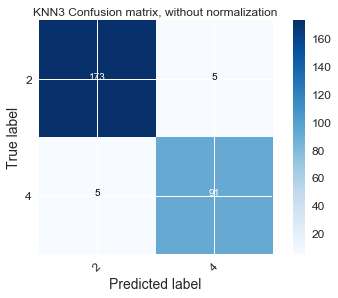

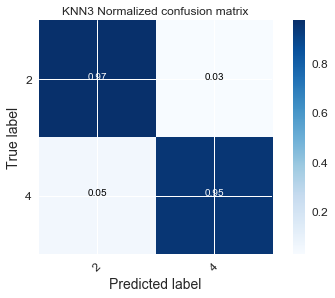

In [31]:
# Confusion Matrix

y_pred_knn3=knn3.predict(X_test_std)

knn3_matrix = confusion_matrix(y_test, y_pred_knn3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn3_matrix, classes=list(np.unique(y)),
                      title='KNN3 Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn3_matrix, classes=list(np.unique(y)), normalize=True,
                      title='KNN3 Normalized confusion matrix')

plt.show()

3.1.Evaluate performance (k=7)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred_knn7 = knn7.predict(X_test_std)
y_pred_knn7_insample = knn7.predict(X_train_std)

# Accuracy
print('knn7_Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_knn7))
print('knn7_Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_knn7_insample))

# F1 score
print('knn7_F1 score (out-of-sample): ', f1_score(y_test, y_pred_knn7, average='macro'))
print('knn7_F1 score (in-sample)    : ', f1_score(y_train, y_pred_knn7_insample, average='macro'))

# Kappa score
print('knn7_Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_knn7))
print('knn7_Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_knn7_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred_knn7, target_names=None))

knn7_Accuracy (out-of-sample): 0.97
knn7_Accuracy (in-sample): 0.98
knn7_F1 score (out-of-sample):  0.968082008271
knn7_F1 score (in-sample)    :  0.981152694118
knn7_Kappa score (out-of-sample):  0.936167734421
knn7_Kappa score (in-sample)    :  0.96230563638
             precision    recall  f1-score   support

          2       0.98      0.97      0.98       178
          4       0.95      0.97      0.96        96

avg / total       0.97      0.97      0.97       274



Confusion matrix, without normalization
[[173   5]
 [  3  93]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.03  0.97]]


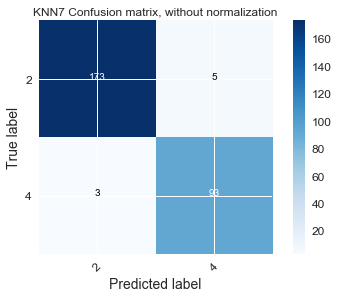

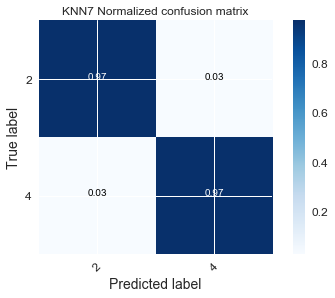

In [33]:
# Confusion Matrix
knn7_matrix = confusion_matrix(y_test, y_pred_knn7)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn7_matrix, classes=list(np.unique(y)),
                      title='KNN7 Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn7_matrix, classes=list(np.unique(y)), normalize=True,
                      title='KNN7 Normalized confusion matrix')

plt.show()

k=7 is better than k=3. Because k=7's performance measurements (accuracy, f1_score, kappa_score on out-of-sample data are higher than k=3's.

# Logistic regression model

1.Build Logistic Regression Model

In [34]:
LR = linear_model.LogisticRegression(C=1e5)

LR = LR.fit(X_train, np.ravel(y_train))
y_predLR = LR.predict(X_test)

2.Evaluate performance

In [43]:
print('The weights of the attributes are:', LR.coef_)

The weights of the attributes are: [[ 1.98  1.83 -0.72  0.89  0.26  2.04  0.9   0.19  0.94]]


3.Confusion Matrix

Confusion matrix, without normalization
[[173   5]
 [  8  88]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.08  0.92]]


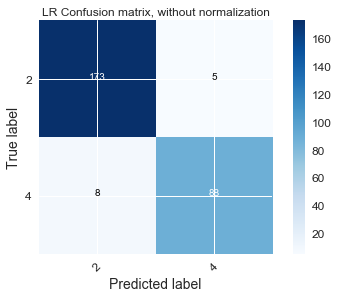

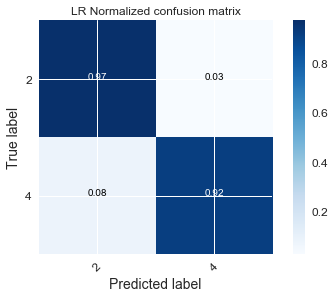

In [36]:
LR_matrix = confusion_matrix(y_test, y_predLR)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(LR_matrix, classes=list(np.unique(y)),
                      title='LR Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(LR_matrix, classes=list(np.unique(y)), normalize=True,
                      title='LR Normalized confusion matrix')

plt.show()

In [42]:
# Estimate the predicted values by applying the LR algorithm
y_pred_LR = LR.predict(X_test_std)
y_pred_LR_insample = LR.predict(X_train_std)

# Accuracy
print('LR_Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_LR))
print('LR_Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_LR_insample))

# F1 score
print('LR_F1 score (out-of-sample): ', f1_score(y_test, y_pred_LR, average='macro'))
print('LR_F1 score (in-sample)    : ', f1_score(y_train, y_pred_LR_insample, average='macro'))

# Kappa score
print('LR_Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_LR))
print('LR_Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_LR_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred_LR, target_names=None))

LR_Accuracy (out-of-sample): 0.95
LR_Accuracy (in-sample): 0.98
LR_F1 score (out-of-sample):  0.947502616026
LR_F1 score (in-sample)    :  0.978495189022
LR_Kappa score (out-of-sample):  0.895019157088
LR_Kappa score (in-sample)    :  0.956990378043
             precision    recall  f1-score   support

          2       0.96      0.97      0.96       178
          4       0.95      0.92      0.93        96

avg / total       0.95      0.95      0.95       274



3.Apply the logistic regression model

In [37]:
# After being fitted, the model can then be used to predict the class of samples:
print('The first two instances are predicted to belong to class:', LR.predict(X.iloc[:2, :]))

# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
print('The probabilities of belonging to each one of the classes are estimated as:', LR.predict_proba(X.iloc[:2, :]))


The first two instances are predicted to belong to class: [2 4]
The probabilities of belonging to each one of the classes are estimated as: [[ 0.99  0.01]
 [ 0.02  0.98]]


4.Learning curve

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

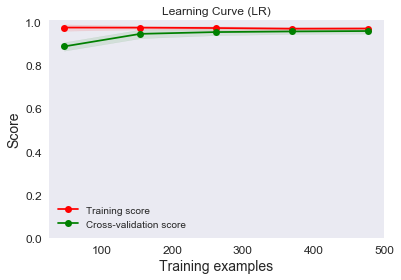

In [39]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

# ROC curve for three models

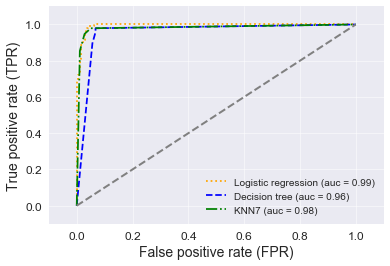

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

LR = linear_model.LogisticRegression(C=1e5)
knn7 = neighbors.KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski') 
DTgini = tree.DecisionTreeClassifier(max_depth=6, random_state=42)

clf_labels = ['Logistic regression', 'Decision tree', 'KNN7']
all_clf = [LR, DTgini, knn3]

colors = [ 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train_std,
                     np.ravel(y_train)).predict_proba(X_test_std)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred,
                                     pos_label=4)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

From ROC, we can know that logistic regression classifier is better (with higher AUC), it has lower False positive rate and higher True Positive rate.